In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics.cluster import pair_confusion_matrix

In [ ]:
Breast_Cancer = datasets.load_breast_cancer()
X = Breast_Cancer.data
y = Breast_Cancer.target

In [ ]:
np.random.seed(15)
gmm_full = GaussianMixture(n_components = 2, covariance_type = "full").fit(X)
gmm_diag = GaussianMixture(n_components = 2, covariance_type = "diag").fit(X)
gmm_tied = GaussianMixture(n_components = 2, covariance_type = "tied").fit(X)
gmm_spherical = GaussianMixture(n_components = 2, covariance_type = "spherical").fit(X)
#proba = gmm.predict_proba(X)
ypred_full = gmm_full.predict(X)
ypred_diag = gmm_diag.predict(X)
ypred_tied = gmm_tied.predict(X)
ypred_spherical = gmm_spherical.predict(X)

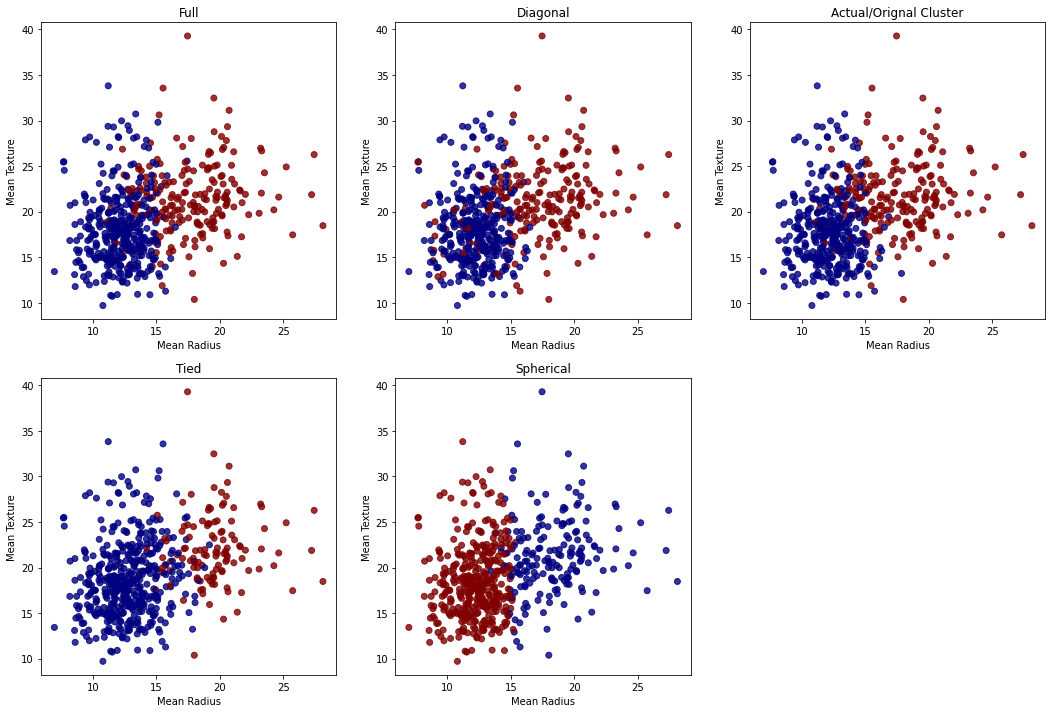

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(231)
plt.scatter(X[:,0],X[:,1],  c=ypred_full, cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Full')

plt.subplot(232)
plt.scatter(X[:,0],X[:,1],  c=ypred_diag, cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Diagonal')

plt.subplot(234)
plt.scatter(X[:,0],X[:,1],  c=ypred_tied, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Tied')

plt.subplot(235)
plt.scatter(X[:,0],X[:,1],  c=ypred_spherical, cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spherical')

plt.subplot(233)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()


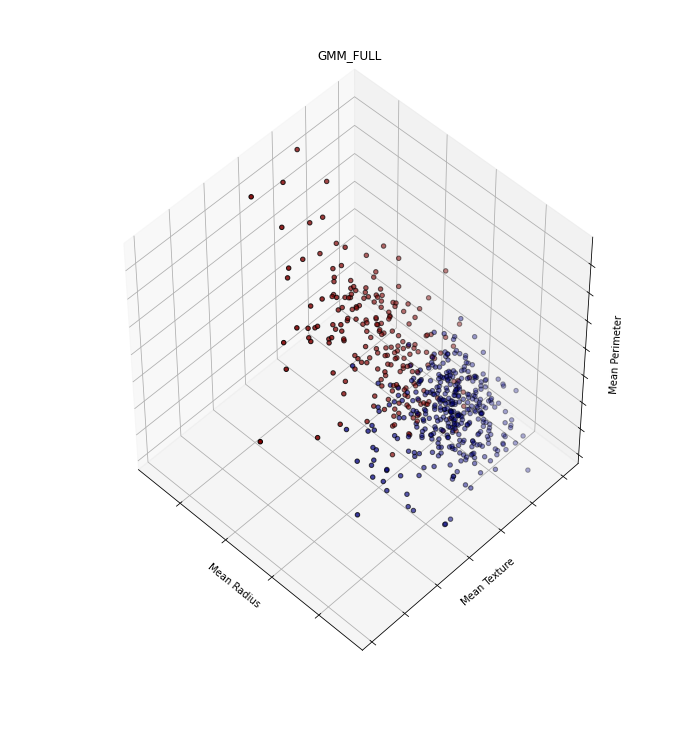

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_full, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('GMM_FULL')
ax.dist=12

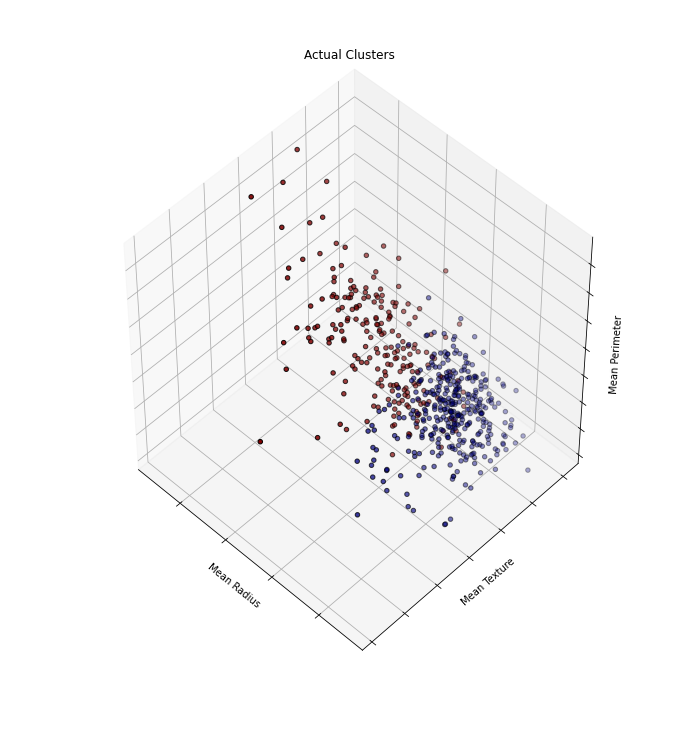

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='jet_r', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('Actual Clusters')
ax.dist=12

In [ ]:
model_dict={'Full':ypred_full,'Diagonal':ypred_diag,'Tied':ypred_tied,'Spherical':ypred_spherical}

In [ ]:
score = {}
for model,pred in model_dict.items():
  list=[]
  list.append((pred == y).sum())
  list.append(np.round(metrics.calinski_harabasz_score(X, pred),4))
  list.append(np.round(metrics.homogeneity_score(y, pred),4))
  list.append(np.round(metrics.completeness_score(y, pred),4))
  list.append(np.round(metrics.v_measure_score(y,pred),4))
  list.append(np.round(metrics.rand_score(y,pred),4))
  list.append(np.round(metrics.adjusted_rand_score(y,pred),4))
  list.append(np.round(metrics.silhouette_score(X, pred, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X, pred),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, pred),4))
  score[model] = list

In [ ]:
columns=['Correct Predictions','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
import pandas as pd
df = pd.DataFrame(score,index=columns)
df.T

,Correct Predictions,Calinski Harbaz Score,Homogeneity Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score,Sillhouette Score,Davies Bouldin Score,Fowlkes Mallows Score
Full,28.0,675.5659,0.7031,0.7092,0.7061,0.9063,0.8116,0.5315,0.7014,0.9123
Diagonal,50.0,446.7581,0.5646,0.5561,0.5603,0.8394,0.6779,0.4536,0.8419,0.8476
Tied,472.0,1109.4786,0.3732,0.4896,0.4235,0.7167,0.4204,0.6710,0.5227,0.7712
Spherical,517.0,997.4999,0.5429,0.5744,0.5582,0.8336,0.6644,0.6305,0.5864,0.8490


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

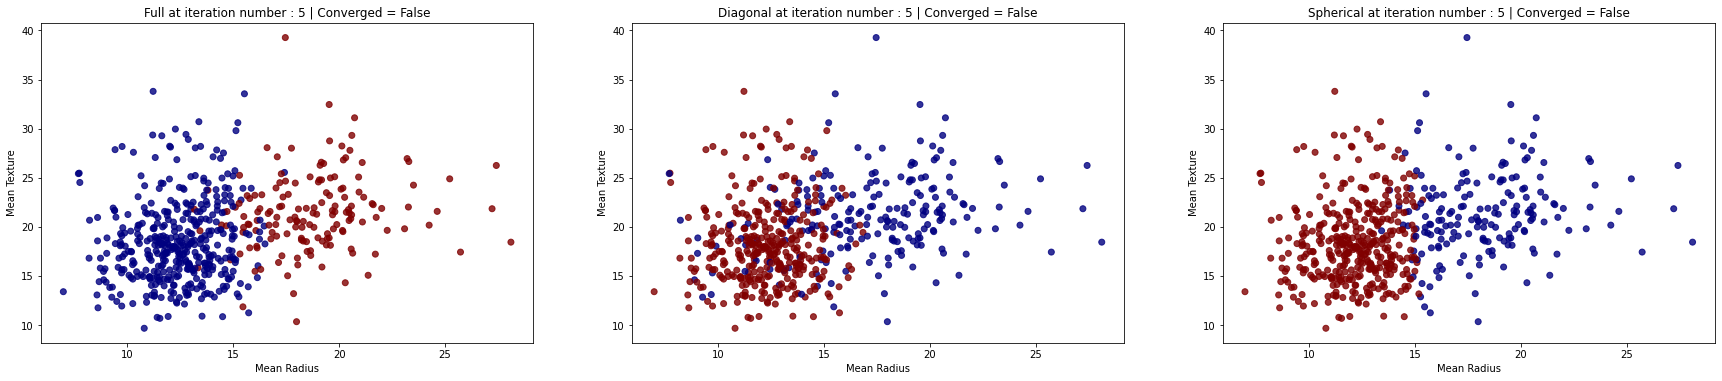

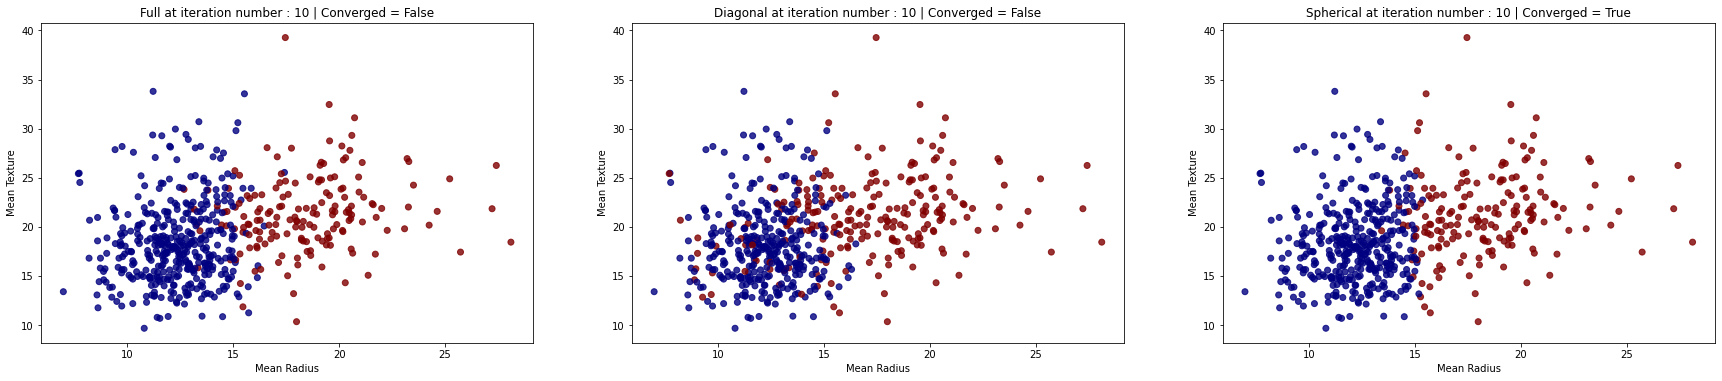

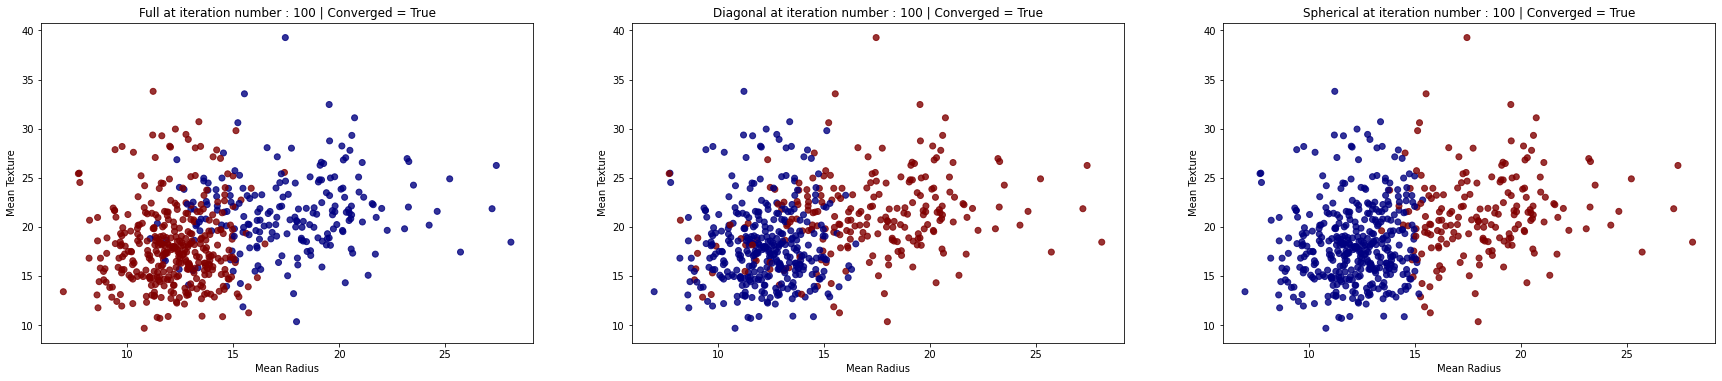

In [ ]:
max_iter = [5,10,100]
fignum = 331

for i in max_iter:
  gmm_full = GaussianMixture(n_components = 2, max_iter = i, covariance_type = "full").fit(X)
  gmm_diag = GaussianMixture(n_components = 2, max_iter = i, covariance_type = "diag").fit(X)
  gmm_spherical = GaussianMixture(n_components = 2, max_iter = i, covariance_type = "spherical").fit(X)
  ypred_full = gmm_full.predict(X)
  ypred_diag = gmm_diag.predict(X)
  ypred_spherical = gmm_spherical.predict(X)

  plt.figure(figsize=(30,20))
  plt.subplot(fignum)
  plt.scatter(X[:,0],X[:,1],  c=ypred_full, cmap = "jet",alpha=0.8)
  plt.xlabel('Mean Radius')
  plt.ylabel('Mean Texture')
  plt.title(f'Full at iteration number : {i} | Converged = {gmm_full.converged_}' )

  fignum += 1 

  plt.subplot(fignum)
  plt.scatter(X[:,0],X[:,1],  c=ypred_diag, cmap = "jet",alpha=0.8)
  plt.xlabel('Mean Radius')
  plt.ylabel('Mean Texture')
  plt.title(f'Diagonal at iteration number : {i} | Converged = {gmm_diag.converged_}')

  fignum += 1 

  plt.subplot(fignum)
  plt.scatter(X[:,0],X[:,1],  c=ypred_spherical, cmap = "jet",alpha=0.8)
  plt.xlabel('Mean Radius')
  plt.ylabel('Mean Texture')
  plt.title(f'Spherical at iteration number : {i} | Converged = {gmm_spherical.converged_}')

  fignum += 1 

In [ ]:
mean_0 = X[y==0].mean(axis=0)
mean_1 = X[y==1].mean(axis=0)

In [ ]:
mean_0

array([1.74628302e+01, 2.16049057e+01, 1.15365377e+02, 9.78376415e+02,
       1.02898491e-01, 1.45187783e-01, 1.60774717e-01, 8.79900000e-02,
       1.92908962e-01, 6.26800943e-02, 6.09082547e-01, 1.21091462e+00,
       4.32392925e+00, 7.26724057e+01, 6.78009434e-03, 3.22811651e-02,
       4.18240094e-02, 1.50604717e-02, 2.04724009e-02, 4.06240566e-03,
       2.11348113e+01, 2.93182075e+01, 1.41370330e+02, 1.42228632e+03,
       1.44845236e-01, 3.74824104e-01, 4.50605566e-01, 1.82237311e-01,
       3.23467925e-01, 9.15299528e-02])

In [ ]:
mean_1

array([1.21465238e+01, 1.79147619e+01, 7.80754062e+01, 4.62790196e+02,
       9.24776471e-02, 8.00846218e-02, 4.60576210e-02, 2.57174062e-02,
       1.74185994e-01, 6.28673950e-02, 2.84082353e-01, 1.22038011e+00,
       2.00032129e+00, 2.11351485e+01, 7.19590196e-03, 2.14382465e-02,
       2.59967356e-02, 9.85765266e-03, 2.05838067e-02, 3.63605126e-03,
       1.33798011e+01, 2.35150700e+01, 8.70059384e+01, 5.58899440e+02,
       1.24959496e-01, 1.82672549e-01, 1.66237723e-01, 7.44443445e-02,
       2.70245938e-01, 7.94420728e-02])

In [ ]:
mean_for_both_classes = np.vstack((mean_0,mean_1))

In [ ]:
mean_for_both_classes.shape

(2, 30)

In [ ]:
estimators = [
    ("GMM_2", GaussianMixture(n_components = 2)),
    ("GMM_3", GaussianMixture(n_components = 3)),
    ("GMM_4", GaussianMixture(n_components = 4)),
    ("GMM_2_bad_init", GaussianMixture(n_components = 2,init_params='random')),
    ("GMM_2_bad_init_number_init_increased", GaussianMixture(n_components = 2,n_init=5,init_params='random',random_state=1)),
    ("GMM_2_changed_convergence_threshold", GaussianMixture(n_components = 2,tol = 0.01)),#1e-2
    ("GMM_2_max_iter_10", GaussianMixture(n_components = 2,max_iter = 10)),
    ("GMM_2_n_init_10", GaussianMixture(n_components = 2,n_init=10)),
    ("GMM_2_changing_mean", GaussianMixture(n_components = 2,means_init=mean_for_both_classes)),
    ("GMM_2_bad_init_changing_mean", GaussianMixture(n_components = 2,init_params='random',means_init=mean_for_both_classes))
]

In [ ]:
score_metrics={}
for name,est in estimators:
  est.fit(X)
  labels = est.predict(X)
  list=[]
  list.append(est.converged_)
  list.append(est.n_iter_)
  if (name not in ['GMM_3','GMM_4']):
    list.append((labels == y).sum())
  else:
    list.append('-')
  list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
  list.append(np.round(metrics.homogeneity_score(y, labels),4))
  list.append(np.round(metrics.completeness_score(y, labels),4))
  list.append(np.round(metrics.v_measure_score(y,labels),4))
  list.append(np.round(metrics.rand_score(y,labels),4))
  list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
  list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X, labels),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
  score_metrics[name] = list

  ## For scoring matrix we are using https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


In [ ]:
columns = ['Model Converged','Number of iterations','Number of correct labels predicted','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
df1 = pd.DataFrame(score_metrics,index=columns)
df1.T.sort_values(['Adjusted Rand Score'])

,Model Converged,Number of iterations,Number of correct labels predicted,Calinski Harbaz Score,Homogeneity Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score,Sillhouette Score,Davies Bouldin Score,Fowlkes Mallows Score
GMM_4,True,10,-,1386.5798,0.534,0.3062,0.3892,0.6672,0.3473,0.4969,0.6348,0.6349
GMM_2_changed_convergence_threshold,True,3,74,1210.833,0.4564,0.5364,0.4932,0.7733,0.5394,0.6811,0.5277,0.8066
GMM_2_bad_init,True,52,496,369.0246,0.4335,0.4285,0.431,0.7759,0.5505,0.4327,0.9331,0.7878
GMM_3,True,9,-,1007.9708,0.6473,0.4433,0.5262,0.7893,0.5828,0.4755,0.6888,0.7839
GMM_2_max_iter_10,False,10,54,1014.1811,0.5439,0.5918,0.5668,0.8279,0.6521,0.6367,0.5812,0.8465
GMM_2_bad_init_number_init_increased,True,20,48,442.9056,0.582,0.5708,0.5764,0.8452,0.6897,0.4452,0.8447,0.8527
GMM_2_changing_mean,True,44,46,605.7333,0.578,0.5797,0.5788,0.8511,0.701,0.5057,0.7361,0.8602
GMM_2,True,20,28,675.5659,0.7031,0.7092,0.7061,0.9063,0.8116,0.5315,0.7014,0.9123
GMM_2_n_init_10,True,20,541,675.5659,0.7031,0.7092,0.7061,0.9063,0.8116,0.5315,0.7014,0.9123
GMM_2_bad_init_changing_mean,True,10,542,625.2735,0.7109,0.7205,0.7157,0.9094,0.818,0.5173,0.7298,0.9155


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(Breast_Cancer.data)
np.random.seed(15)

In [ ]:
score_metrics_scaled ={}
for name,est in estimators:
  est.fit(X_scaled)
  labels = est.predict(X_scaled)
  print(name)
  list=[]
  list.append(est.converged_)
  list.append(est.n_iter_)
  if (name not in ['GMM_3','GMM_4']):
    list.append((labels == y).sum())
  else:
    list.append('-')
  list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
  list.append(np.round(metrics.homogeneity_score(y, labels),4))
  list.append(np.round(metrics.completeness_score(y, labels),4))
  list.append(np.round(metrics.v_measure_score(y,labels),4))
  list.append(np.round(metrics.rand_score(y,labels),4))
  list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
  list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
  score_metrics_scaled[name] = list

  ## For scoring matrix we are using https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

GMM_2
GMM_3
GMM_4
GMM_2_bad_init
GMM_2_bad_init_number_init_increased
GMM_2_changed_convergence_threshold
GMM_2_max_iter_10
GMM_2_n_init_10
GMM_2_changing_mean


ValueError: ignored

In [ ]:
df1_scaled = pd.DataFrame(score_metrics)
df1_scaled.T